# Challenge: Animate a Scatterplot

### load the file into pandas

In [1]:
import pandas as pd

### Step 1 & 2) load dataframes

In [4]:
fert = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
life = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)
life.head(8)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00


### Step 3) check whether both tables have the same size and shape

In [6]:
print(fert.shape, life.shape) # 260 rows

(260, 216) (260, 217)


### Step 4) merge tables
#### 1. print the column names of both tables 

In [7]:
print('fer cols:', fert.columns , '\n life cols:', life.columns)

fer cols: Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216) 
 life cols: Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)


#### 2. to be able to merge the tables, convert strings in the column names to integers 
#### 2.1 create a list of years as integers
#### 2.2 use this list as the new columns

In [8]:
ncol = [int(x) for x in fert.columns]
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [9]:
fert.columns # transformation was succesful!

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

### Step 5) create a hierarchical index
#### 1. convert both tables to the long format

In [10]:
sfert = fert.stack()
slife = life.stack()

type(slife) # datatype is now pd.Series

pandas.core.series.Series

#### 2. multiple series can be converted to a pd.DataFrame, using a dictionary with the values:

#### 2.1 fertility and life expectancy df

In [11]:
dict = {'fertility': sfert, 'lifeexp': slife}
df_hierach = pd.DataFrame(data=dict)
df_hierach.iloc[95:220, :]

fertility  lifeexp
Afghanistan 1895       7.00    27.24
            1896       7.00    27.23
            1897       7.00    27.22
            1898       7.00    27.21
            1899       7.00    27.20
...                     ...      ...
            2015       4.47    53.80
            2016        NaN    52.72
Albania     1800       4.60    35.40
            1801       4.60    35.40
            1802       4.60    35.40

[125 rows x 2 columns]

### Step 6) repeat the steps with the the gapminder population dataset

In [13]:
# read excel file into pandas df
pop = pd.read_excel('data/gapminder_population.xlsx', index_col=0)
print(pop.head(2))

print(pop.columns) #col names are alreay integers, 10 year steps until 1950
print(pop.shape) # 275 rows(countries), only 81 columns

                       1800       1810       1820       1830       1840  \
Total population                                                          
Abkhazia                NaN        NaN        NaN        NaN        NaN   
Afghanistan       3280000.0  3280000.0  3323519.0  3448982.0  3625022.0   

                       1850       1860       1870       1880       1890  ...  \
Total population                                                         ...   
Abkhazia                NaN        NaN        NaN        NaN        NaN  ...   
Afghanistan       3810047.0  3973968.0  4169690.0  4419695.0  4710171.0  ...   

                        2006        2007        2008        2009        2010  \
Total population                                                               
Abkhazia                 NaN         NaN         NaN         NaN         NaN   
Afghanistan       25183615.0  25877544.0  26528741.0  27207291.0  27962207.0   

                        2011        2012        2013     

In [14]:
#  convert to long format
spop = pop.stack()

spop.head(5)

Total population      
Afghanistan       1800    3280000.0
                  1810    3280000.0
                  1820    3323519.0
                  1830    3448982.0
                  1840    3625022.0
dtype: float64

In [15]:
# create pd.DataFrame from the 3 series
dict = {'fertility': sfert, 'lifeexp': slife, 'population': spop }
df_hierach_all = pd.DataFrame(data=dict)
df_hierach_all.iloc[95:220, :]

fertility  lifeexp  population
Afghanistan           1895       7.00    27.24         NaN
                      1896       7.00    27.23         NaN
                      1897       7.00    27.22         NaN
                      1898       7.00    27.21         NaN
                      1899       7.00    27.20         NaN
...                               ...      ...         ...
                      2015       4.47    53.80  32526562.0
                      2016        NaN    52.72         NaN
Akrotiri and Dhekelia 1950        NaN      NaN     10661.0
                      1951        NaN      NaN     10737.0
                      1952        NaN      NaN     10813.0

[125 rows x 3 columns]

### Step 7) stack df
- the huge DataFrame is easier to covert to the right format, if we first interpret all indices(rows and columns) as row indices:

In [16]:
df3 = df_hierach_all.stack()

df3.head(10)

Afghanistan  1800  fertility           7.00
                   lifeexp            28.21
                   population    3280000.00
             1801  fertility           7.00
                   lifeexp            28.20
             1802  fertility           7.00
                   lifeexp            28.19
             1803  fertility           7.00
                   lifeexp            28.18
             1804  fertility           7.00
dtype: float64

#### convert the long table back to the wide format
- to do so, create new columns from the 1st and 3rd level of the index (the country names and attributes)
- the zero stands for the first element of an index. With the value 1 all year numbers would end up as columns
- now, df4 is a table with years on the left side and life expectancy for all countries on top

In [17]:
df3.unstack(2)

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN
            1803        7.0    28.18         NaN
            1804        7.0    28.17         NaN
...                     ...      ...         ...
Åland       2006        NaN    80.10     26923.0
            2007        NaN      NaN     26923.0
            2008        NaN      NaN     26923.0
            2009        NaN      NaN     26923.0
            2010        NaN      NaN     26923.0

[47688 rows x 3 columns]

In [18]:
df4 = df3.unstack((0,2))
df4.head()

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp population            population fertility lifeexp   
1800         7.0   28.21  3280000.0                   NaN       4.6    35.4   
1801         7.0   28.20        NaN                   NaN       4.6    35.4   
1802         7.0   28.19        NaN                   NaN       4.6    35.4   
1803         7.0   28.18        NaN                   NaN       4.6    35.4   
1804         7.0   28.17        NaN                   NaN       4.6    35.4   

                  Algeria                     ...      Yemen Yugoslavia  \
     population fertility lifeexp population  ... population population   
1800   410445.0      6.99   28.82  2503218.0  ...  2593000.0        NaN   
1801        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1803        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1804        NaN      6.99   28.82        NaN  ...        NaN        NaN   

        Zambia                     Zimbabwe                         Åland  \
     fertility lifeexp population fertility lifeexp population population   
1800      6.71    32.6   747000.0      6.75    33.7  1085814.0        NaN   
1801      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1802      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1803      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1804      6.71    32.6        NaN      6.75    33.7        NaN        NaN   

              
     lifeexp  
1800     NaN  
1801     NaN  
1802     NaN  
1803     NaN  
1804     NaN  

[5 rows x 667 columns]

In [19]:
df_1960 = df4.loc[1960:2016]

print(df_1960.head())
df_1960_stacked = df_1960.stack(0,1) # get countries as second index

print(df_1960_stacked)

# get min and max values for fertility and life exp for axis lengths
print('fertility_min', df_1960_stacked['fertility'].min(),
      'fertility_max', df_1960_stacked['fertility'].max(),
      'lifeexp_min', df_1960_stacked['lifeexp'].min(),
      'lifeexp_min', df_1960_stacked['lifeexp'].max())

     Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp population            population fertility lifeexp   
1960        7.67   31.94  8994793.0               11439.0      6.19   62.87   
1961        7.67   32.47  9164945.0               11519.0      6.08   63.92   
1962        7.67   33.01  9343772.0               11601.0      5.96   64.84   
1963        7.67   33.53  9531555.0               11683.0      5.83   65.60   
1964        7.67   34.07  9728645.0               11765.0      5.71   66.18   

                  Algeria                      ...      Yemen  Yugoslavia  \
     population fertility lifeexp  population  ... population  population   
1960  1636054.0      7.65   47.50  11124892.0  ...  5166311.0  18139623.0   
1961  1685901.0      7.65   48.02  11404859.0  ...  5251663.0  18316990.0   
1962  1737645.0      7.65   48.55  11690152.0  ...  5339285.0  18501105.0   
1963  1790533.0      7.65   49.07  11985130.0  ...  5429501.0

### Step 8) select specific columns and plot them

In [20]:
import matplotlib.pyplot as plt
df4[['Germany', 'France', 'Sweden', 'Afghanistan', 'Zimbabwe']]
# in the early 19th century, the life expectancy did not differ that much between nowadays developed
# and developing/emerging countries

Germany                        France                        Sweden  \
     fertility lifeexp  population fertility lifeexp  population fertility   
1800      5.40   38.37  22886919.0      4.41   33.97  29355111.0      4.07   
1801      5.40   38.37         NaN      4.36   36.37         NaN      4.26   
1802      5.39   38.37         NaN      4.31   34.38         NaN      4.50   
1803      5.39   38.37         NaN      4.26   30.64         NaN      4.45   
1804      5.38   38.37         NaN      4.21   29.38         NaN      4.52   
...        ...     ...         ...       ...     ...         ...       ...   
2012      1.41   80.60  80477952.0      1.98   81.60  63561798.0      1.91   
2013      1.42   80.70  80565861.0      1.98   81.70  63844529.0      1.93   
2014      1.43   80.70  80646262.0      1.98   81.70  64121249.0      1.93   
2015      1.44   80.80  80688545.0      1.98   81.80  64395345.0      1.93   
2016       NaN   80.90         NaN       NaN   81.90         NaN       NaN   

                        Afghanistan                      Zimbabwe          \
     lifeexp population   fertility lifeexp  population fertility lifeexp   
1800   32.16  2354189.0        7.00   28.21   3280000.0      6.75   33.70   
1801   36.90        NaN        7.00   28.20         NaN      6.75   33.70   
1802   40.20        NaN        7.00   28.19         NaN      6.75   33.70   
1803   40.28        NaN        7.00   28.18         NaN      6.75   33.70   
1804   39.70        NaN        7.00   28.17         NaN      6.75   33.70   
...      ...        ...         ...     ...         ...       ...     ...   
2012   81.80  9543457.0        5.14   54.40  29726803.0      3.56   54.20   
2013   81.90  9624247.0        4.90   54.80  30682500.0      3.49   55.70   
2014   82.10  9703247.0        4.68   54.90  31627506.0      3.41   57.00   
2015   82.10  9779426.0        4.47   53.80  32526562.0      3.35   59.30   
2016   82.10        NaN         NaN   52.72         NaN       NaN   61.69   

                  
      population  
1800   1085814.0  
1801         NaN  
1802         NaN  
1803         NaN  
1804         NaN  
...          ...  
2012  14565482.0  
2013  14898092.0  
2014  15245855.0  
2015  15602751.0  
2016         NaN  

[217 rows x 15 columns]

- to create a scatterplot, extract the columns to plot from df3

In [21]:
df5 = df3.unstack(2)
df5.head(10)

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN
            1803        7.0    28.18         NaN
            1804        7.0    28.17         NaN
            1805        7.0    28.16         NaN
            1806        7.0    28.15         NaN
            1807        7.0    28.14         NaN
            1808        7.0    28.13         NaN
            1809        7.0    28.12         NaN

<AxesSubplot:xlabel='fertility', ylabel='lifeexp'>

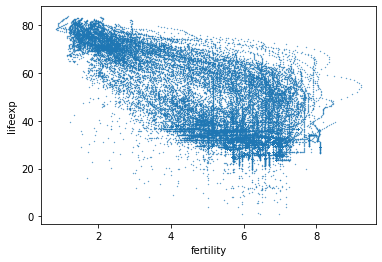

In [22]:
df5.plot.scatter('fertility', 'lifeexp', s=0.1) # s=size of the dots
# all countries and all years on top of each other

- using stack and unstack you can also select a year

(0.5, 14.0, 9.0, 85.0)

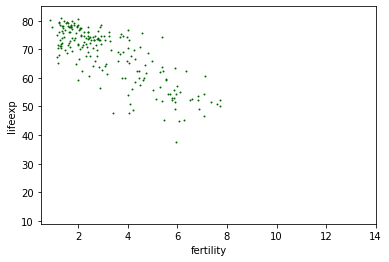

In [23]:
df6 = df3.unstack(1)
df6 = df6[2000]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.9, c='darkgreen')
plt.axis((0.5,14,9,85))

# all countries for one year

### Step 9) improve the graphics:
- color each country differently

<AxesSubplot:xlabel='fertility', ylabel='lifeexp'>

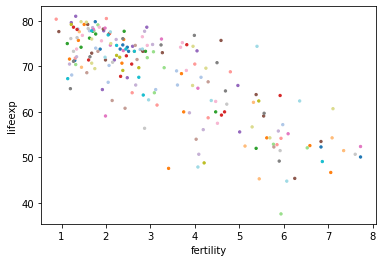

In [24]:
# choose colormap which you want to use from matplotlib
cmap = plt.get_cmap('tab20', lut=len(df6)).colors
# the lut parameter allows you to control for the length of the color
# array (default=20)
df6.plot.scatter('fertility', 'lifeexp', s=5.5, c=cmap)

<AxesSubplot:xlabel='fertility', ylabel='lifeexp'>

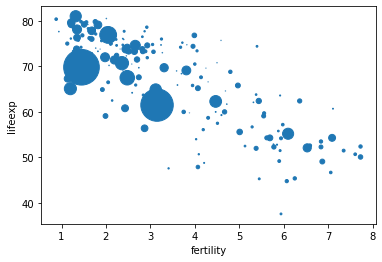

In [25]:
# use a third column with the size of the dots
df6.plot.scatter('fertility', 'lifeexp', s=df6['population']/1000000)

### Step 10) to create an animated scatterplot 
- showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps)

In [26]:
df7 = df3.unstack(1)
df7.head()

1800  1801   1802   1803   1804  \
Afghanistan           fertility         7.00   7.0   7.00   7.00   7.00   
                      lifeexp          28.21  28.2  28.19  28.18  28.17   
                      population  3280000.00   NaN    NaN    NaN    NaN   
Akrotiri and Dhekelia population         NaN   NaN    NaN    NaN    NaN   
Albania               fertility         4.60   4.6   4.60   4.60   4.60   

                                   1805   1806   1807   1808   1809  ...  \
Afghanistan           fertility    7.00   7.00   7.00   7.00   7.00  ...   
                      lifeexp     28.16  28.15  28.14  28.13  28.12  ...   
                      population    NaN    NaN    NaN    NaN    NaN  ...   
Akrotiri and Dhekelia population    NaN    NaN    NaN    NaN    NaN  ...   
Albania               fertility    4.60   4.60   4.60   4.60   4.60  ...   

                                         2007         2008         2009  \
Afghanistan           fertility          6.46         6.20         5.93   
                      lifeexp           52.40        52.80        53.30   
                      population  25877544.00  26528741.00  27207291.00   
Akrotiri and Dhekelia population     15700.00     15700.00          NaN   
Albania               fertility          1.80         1.76         1.74   

                                         2010         2011         2012  \
Afghanistan           fertility          5.66         5.40         5.14   
                      lifeexp           53.60        54.00        54.40   
                      population  27962207.00  28809167.00  29726803.00   
Akrotiri and Dhekelia population          NaN          NaN          NaN   
Albania               fertility          1.74         1.75         1.76   

                                         2013         2014         2015   2016  
Afghanistan           fertility          4.90         4.68         4.47    NaN  
                      lifeexp           54.80        54.90        53.80  52.72  
                      population  30682500.00  31627506.00  32526562.00    NaN  
Akrotiri and Dhekelia population          NaN          NaN          NaN    NaN  
Albania               fertility          1.77         1.78         1.78    NaN  

[5 rows x 217 columns]

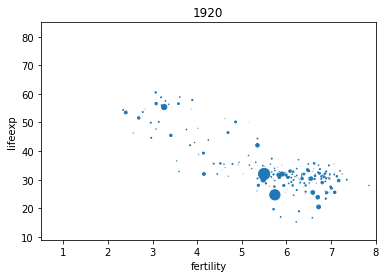

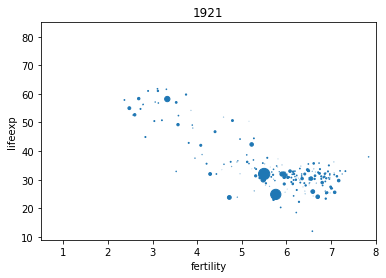

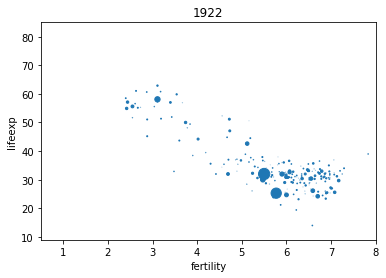

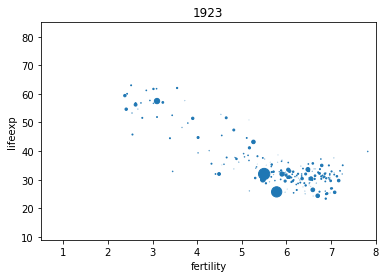

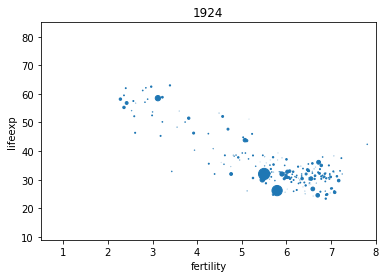

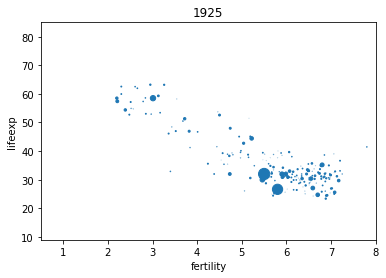

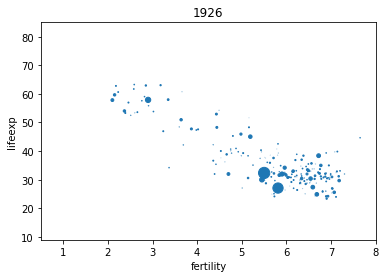

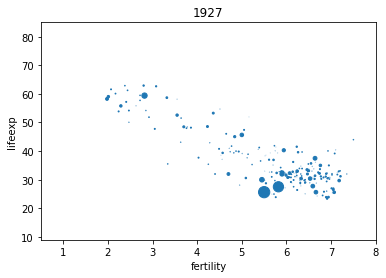

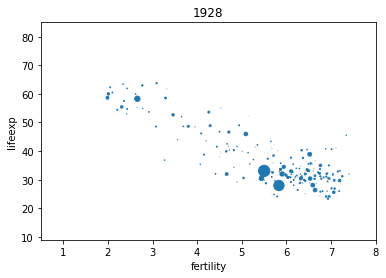

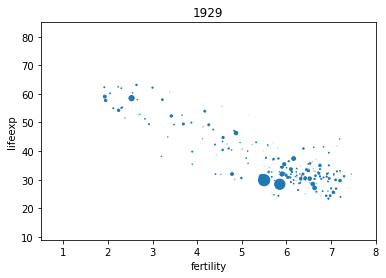

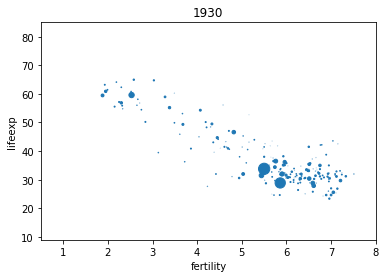

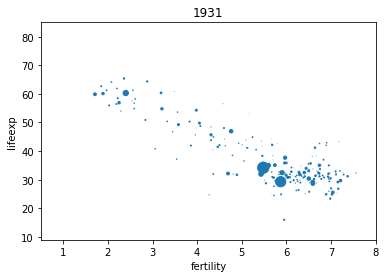

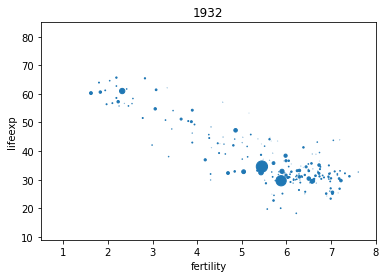

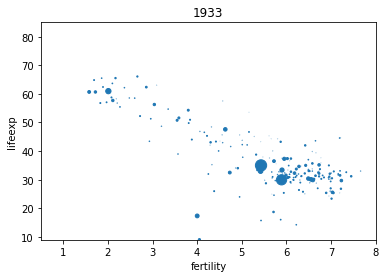

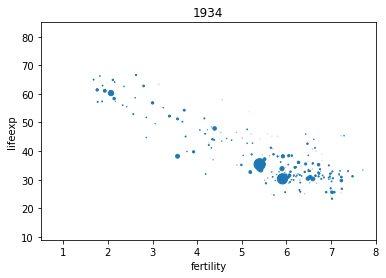

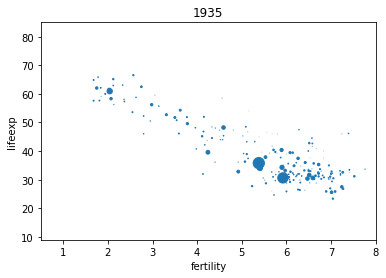

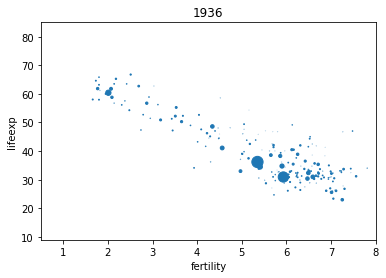

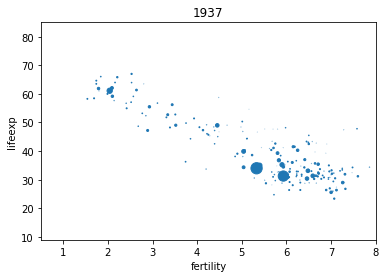

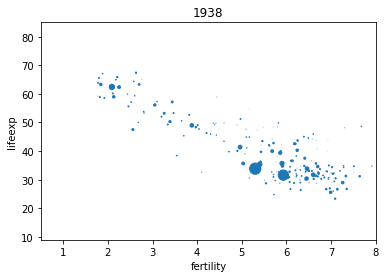

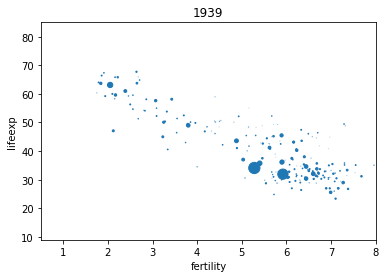

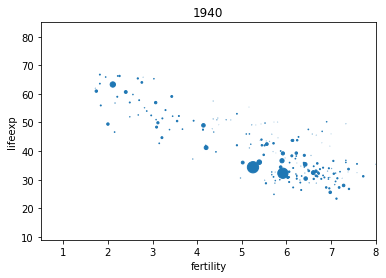

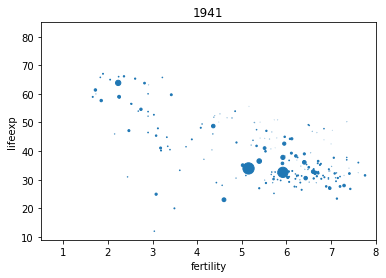

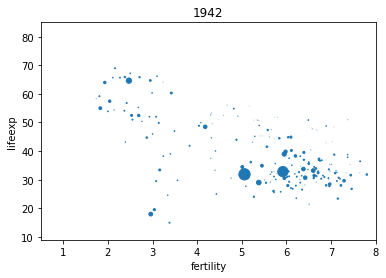

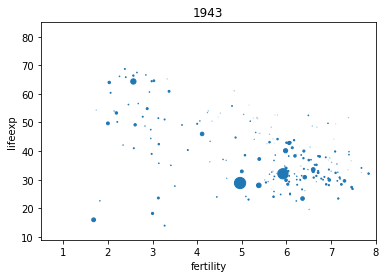

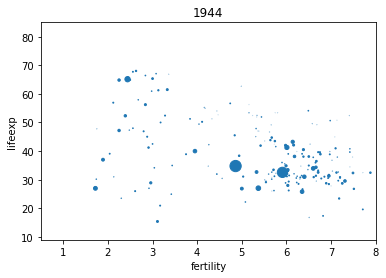

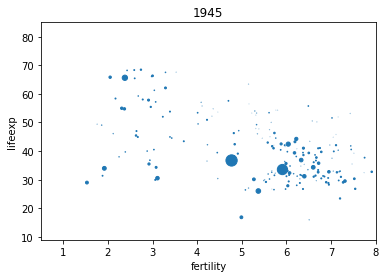

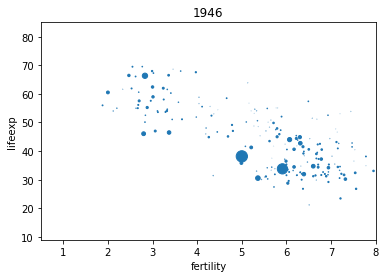

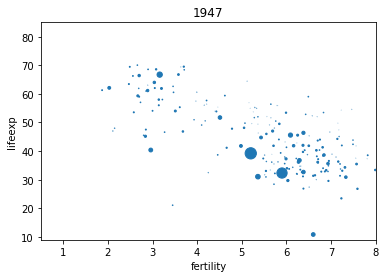

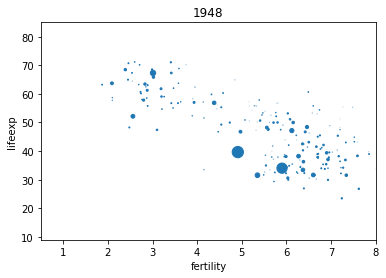

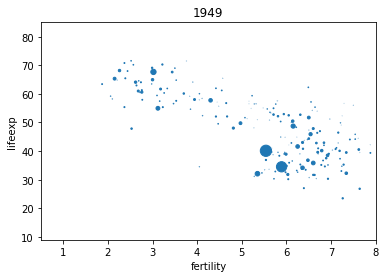

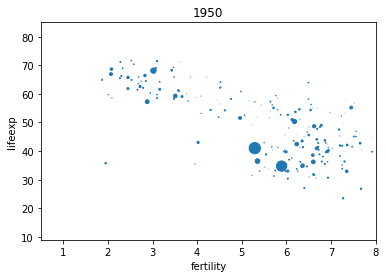

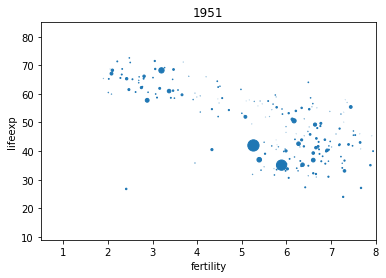

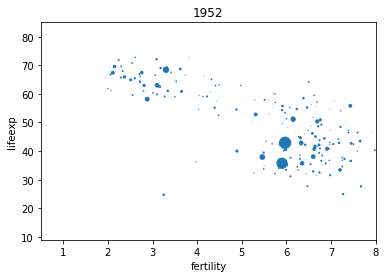

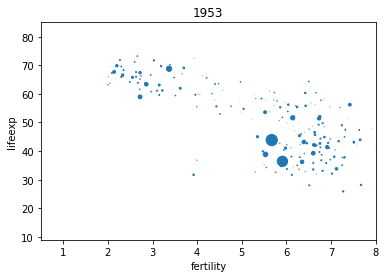

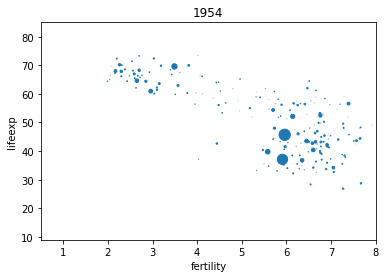

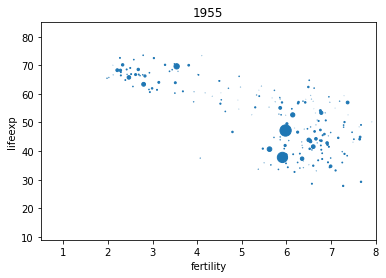

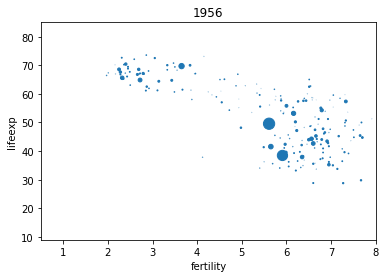

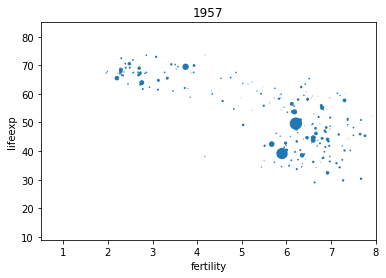

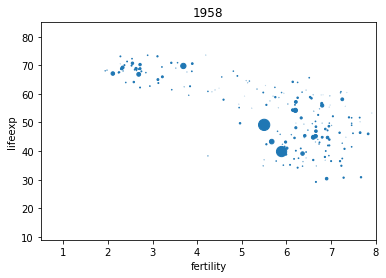

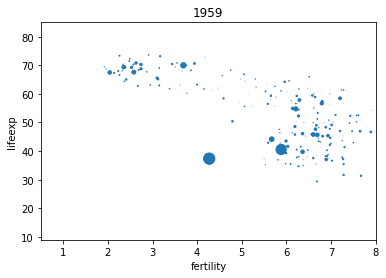

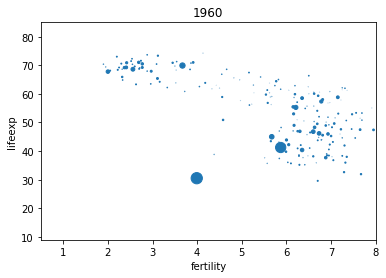

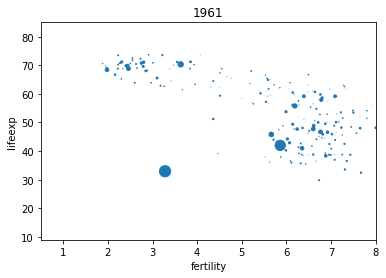

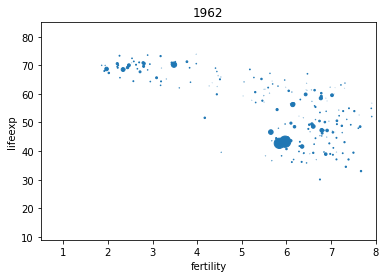

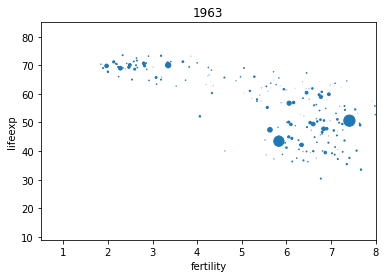

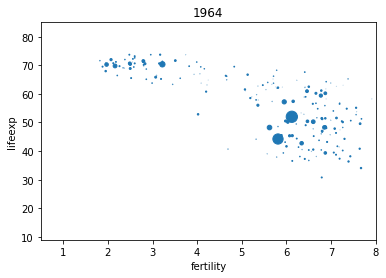

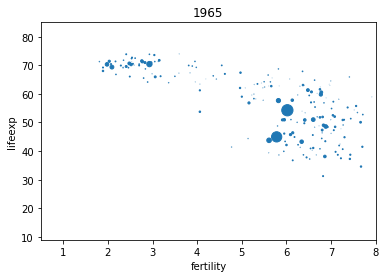

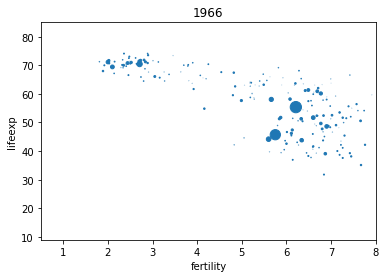

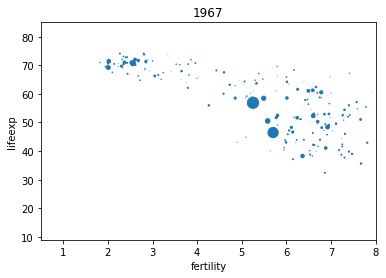

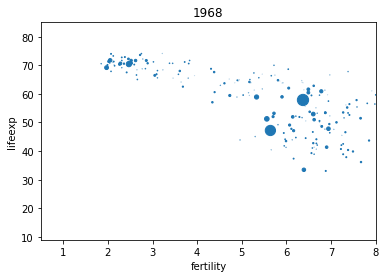

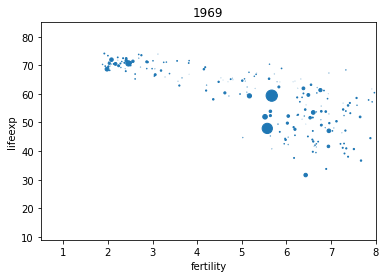

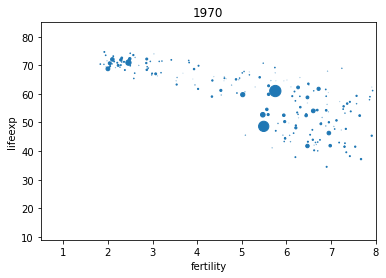

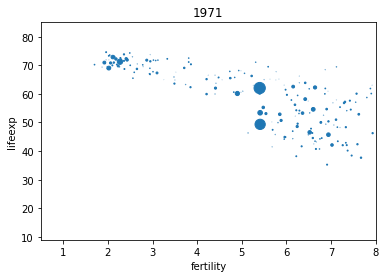

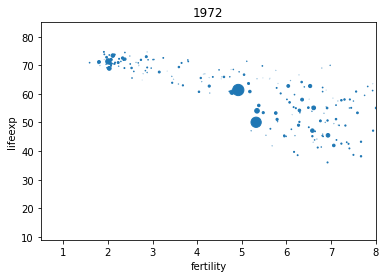

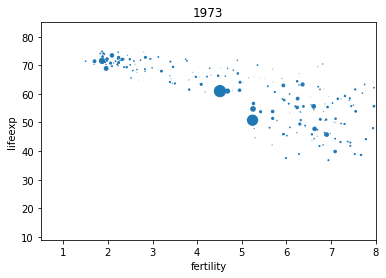

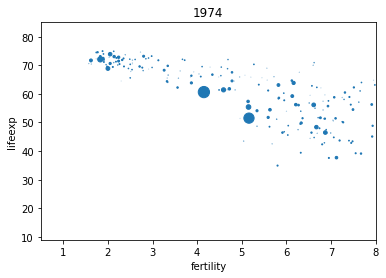

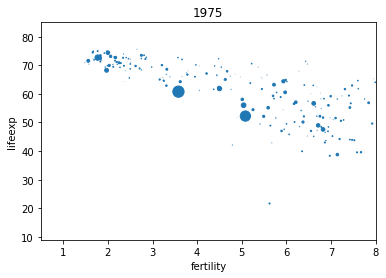

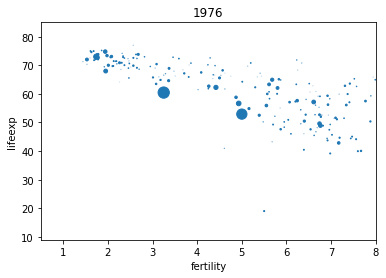

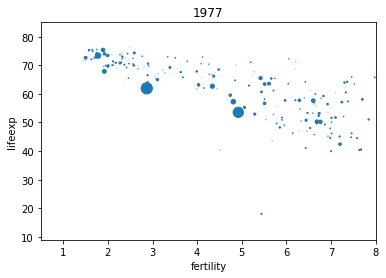

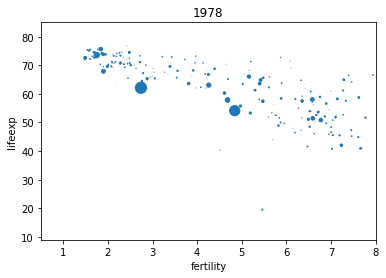

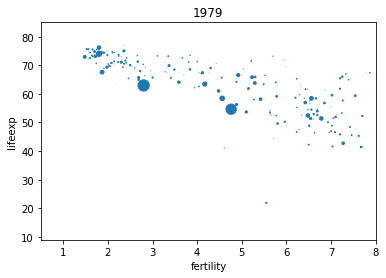

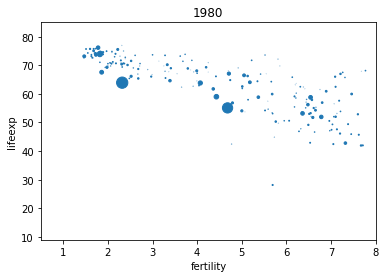

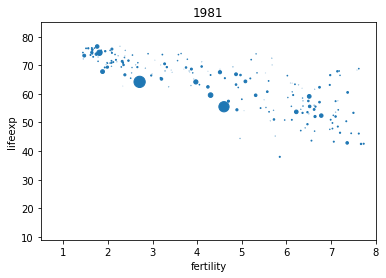

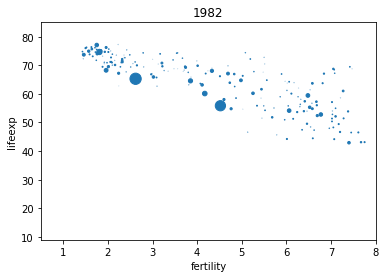

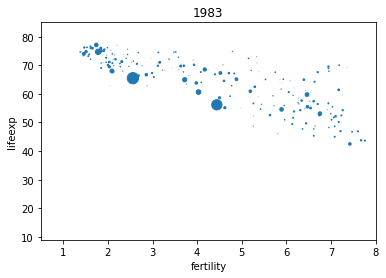

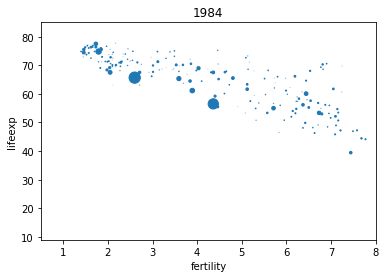

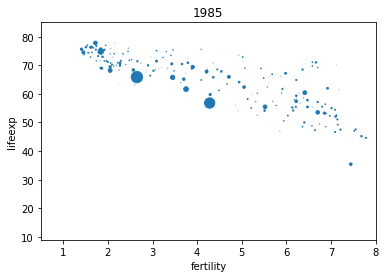

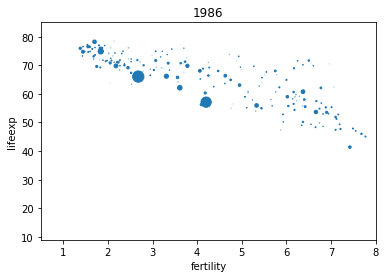

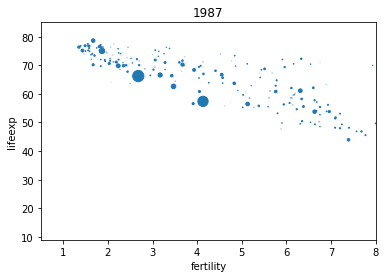

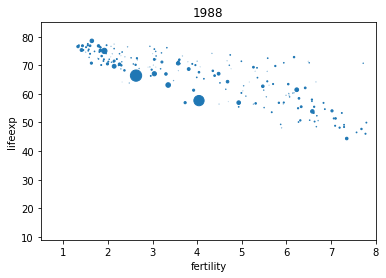

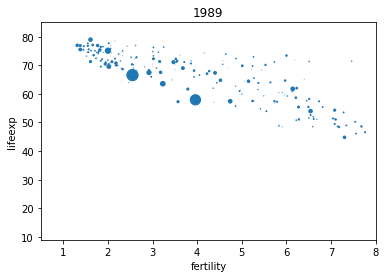

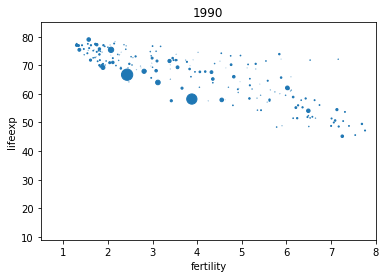

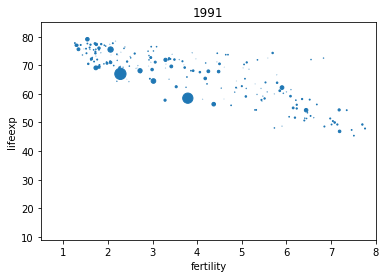

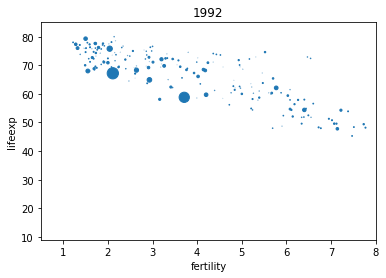

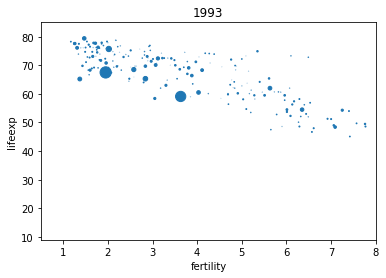

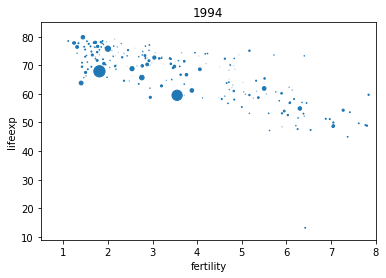

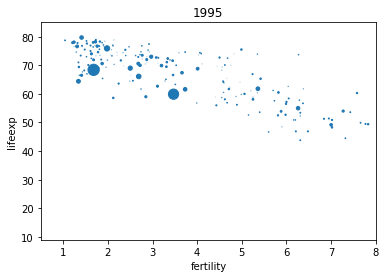

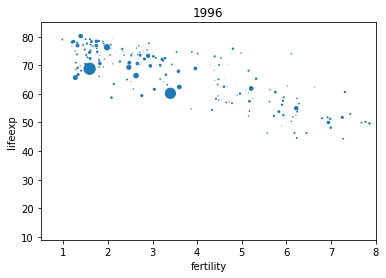

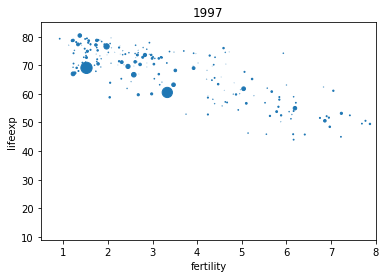

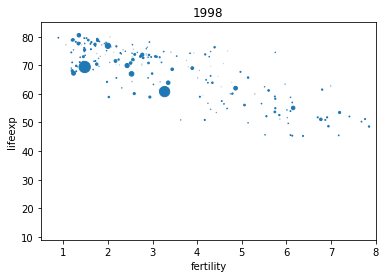

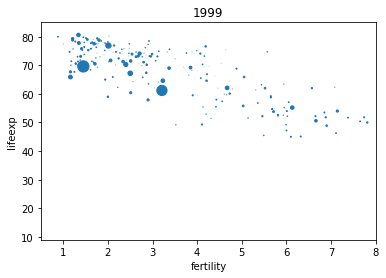

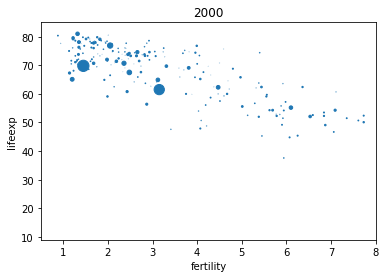

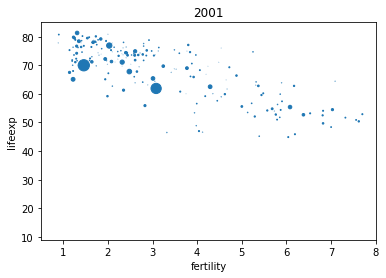

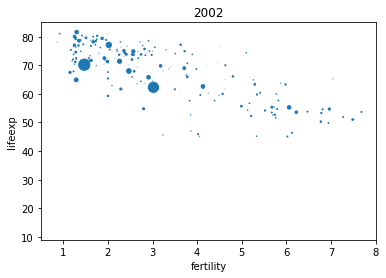

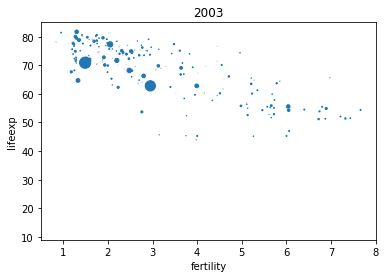

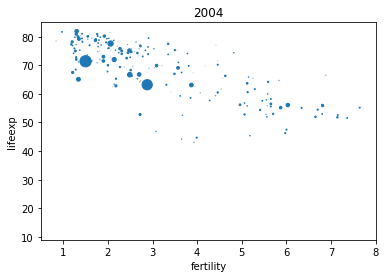

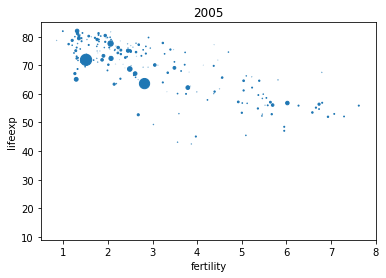

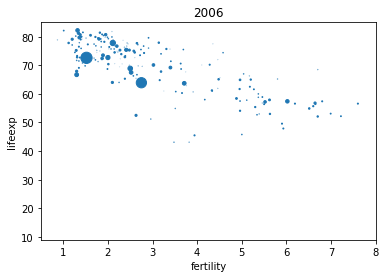

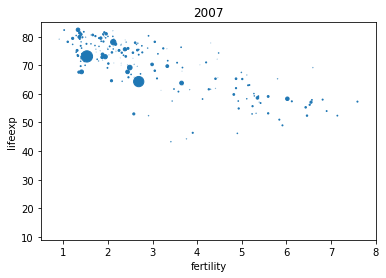

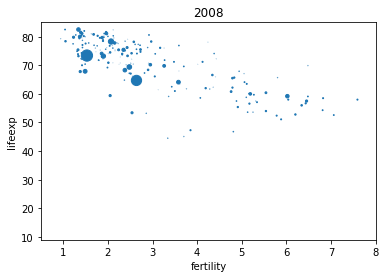

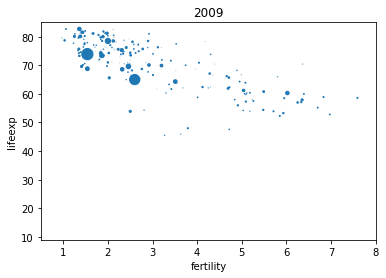

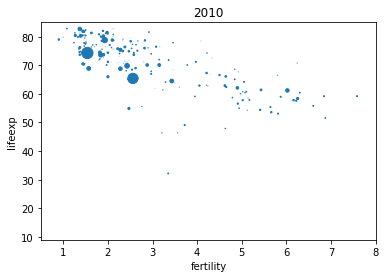

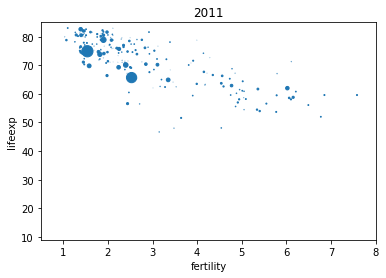

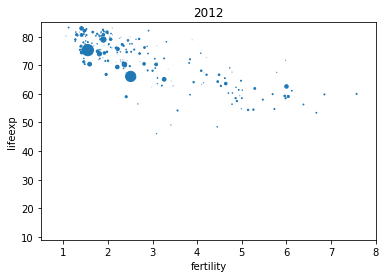

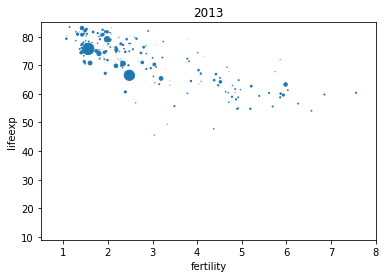

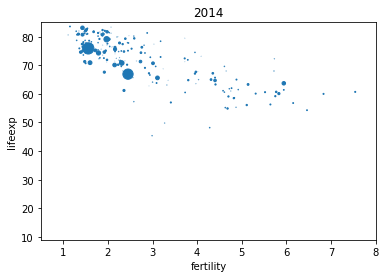

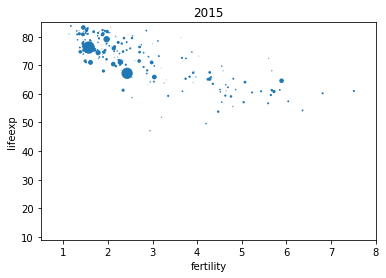

In [34]:
# suppress plotting within jupyter notebook
#%matplotlib agg  



for year in range(1920,2016):
    
#     df7 = df3.unstack(1)
#     df_single_year_long_f = df7[year] # all three characteristics for one year; long format
#     df_single_year_wide_f= df_single_year_long_f.unstack(1) # wide format
#     df_single_year_wide_f.plot.scatter('fertility', 'lifeexp', s=df6['population']/10000000)
    
    # in one line
    df3.unstack(1)[year].unstack(1).plot.scatter('fertility', 'lifeexp', s=df6['population']/10000000)
    
    plt.axis((0.5,8,9,85))
    plt.title(str(year))
    
    #plt.savefig('scatterplots_per_year/lifeexp_' + str(year) + '.png')
    # using f-strings:
    plt.savefig(f'animated_plot/lifeexp_{year}.png')
    


### Step 12: 

In [35]:
# pip install imageio

import imageio

images = []

for i in range(1960, 2015):
    filename = 'animated_plot/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

    
# # solution using os
# import os
# for file in os.listdir():
#     if file.startswith('image'):
#         img = imageio.imread(file)
#         images.append()
    
imageio.mimsave('output.gif', images, fps=20)

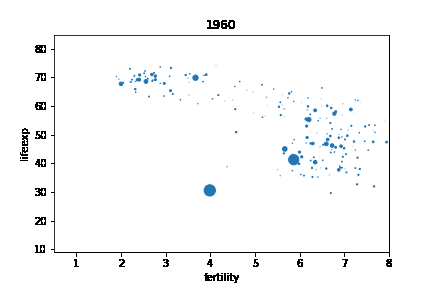

In [36]:
# display the gif in this jupyter notebook
from IPython.display import Image
Image(filename="output.gif")

In [38]:
# for year in df3.columns:
#     df = df3.unstack(1)[year].unstack(1).plot.scatter('fertility', 'lifeexp', s=df6['population']/10000000)

#     df.plot.scatter('fertility', 'lifeexp', s=df['population']/1000000, c=cmap)
#     plt.axis(axes)
#     plt.title('Fertility and Life Expectancy')
#     plt.xlabel("Fertility")
#     plt.ylabel('Life expectancy')
#     plt.annotate(f'{year}', (0.8,0.85), xycoords='axes fraction', fontsize=17) 

#     for x in plt.gca().spines:
#         if x in ['top', 'right']:
#             plt.gca().spines[x].set_visible(False)
#         plt.savefig(imgname(year))



